# Exercise 3 - Building Model
Write a class ``Building`` in a file ``Building.py`` in the same directory that contains the data folder and this exercise. 

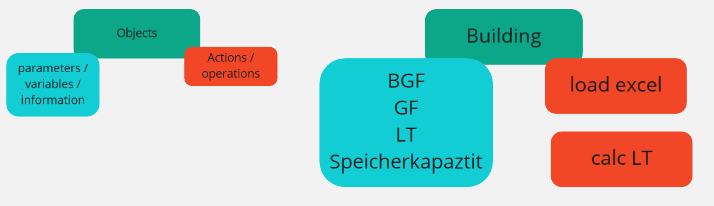

The class reads a building.xlsx, populates the relevant attributes from two sheets "params" and "thermal_hull", and calculates the LT! To do this, it will reuse the functions you wrote in Exercise 2 and use it as its class methods.

> More on Classes and Methods: https://towardsdatascience.com/get-started-with-object-oriented-programming-in-python-classes-and-instances-2c1849e0b411

The class' ``__init__`` method shoud take the following Inputs
* ``path`` the path of the excel


### Attributes
The class needs to have the following attributes that we can later use in the simulation model, so take care when naming:
* ``self.bgf`` Bruttogeschoßfläche aus dem Blatt params
* ``self.heat_capacity`` Spez. Wirksame Speicherkapazität des GEbäudes in Wh/m²K  im Blatt params
* ``self.net_storey_height`` Netto Raumhöhe
* ``self.LT`` Leitwert

You can and should use additional variables and attributes to make the programming more understandable. 

### Methods
Build upon exercise 2 and repurpose the functions you developed to read the excel, calculate the relevant additional parameters and call all methods in the right order in the ``__init__()`` function to build the Building model.  As a suggestion, the building Class could have the following methods to calculate the Attributes:
* ``load_params(self, path): `` loads the sheet "params" of a excel at path and returns it as a dataframe
* ``load_hull(self, path):`` loads the sheet "thermal_ hull" of a excel at path and returns it as a dataframe
* ``insert_windows(self, hull_df, u_f, ff_anteil):`` takes a hull dataframe from load_hull() and replaces an opak wall with a wall and a window entry, taking the window share and u-value as inputs. **Add the u_f, and ff_anteil variables also to the ``__init__`` parameters and pass it there to the insert_windows() call.** 
* ``L_T(self, hull_df):`` calculates the LT from a Hull Dataframe

## Test
Test the Building class by creating an instance of the class with all available building exels.
see that all required attribues work as expected and compare the LT of the buildings.
Try different "Fensterflächenanteile"


In [1]:
from Building import Building
test = Building()
print(test.bgf)
print(test.heat_capacity)
print(test.net_storey_height)
print(test.LT)

1440.0
200.0
2.8
0.5836395696898397


In [2]:
test.params_df

,Variable,Value,Unit
Variable,,,
gross_floor_area,gross_floor_area,1440.0,m² BGF
plot_size,plot_size,1000.0,m²
effective_heat_capacity,effective_heat_capacity,200.0,Wh/m²/K
net_storey_height,net_storey_height,2.8,m Netto
differential_cost,differential_cost,0.0,€/m²BGF


In [3]:
test.hull_df
#note that the original excel only had the 

,Bauteil,Fläche,U-Wert,Temperatur-Korrekturfaktor,L_B
1,Dach,360.00,0.15,1,54.0000
2,Fußboden,360.00,0.40,1,144.0000
3,AW (opak),645.12,0.30,1,193.5360
4,Fenster,430.08,0.93,1,399.9744


In [5]:
ph = Building("data/building_ph.xlsx")
ph.LT


0.4282163004705883

In [7]:
ph.hull_df

,Bauteil,Fläche,U-Wert,Temperatur-Korrekturfaktor,L_B
1,Dach,360.00,0.10,1,36.0000
2,Fußboden,360.00,0.15,1,54.0000
3,AW (opak),645.12,0.12,1,77.4144
4,Fenster,430.08,0.93,1,399.9744


In [6]:
oib = Building("data/building_oib_16linie.xlsx")
oib.LT

0.4708023032085562

In [8]:
oib.hull_df

,Bauteil,Fläche,U-Wert,Temperatur-Korrekturfaktor,L_B
1,Dach,360.00,0.12,1,43.2000
2,Fußboden,360.00,0.19,1,68.4000
3,AW (opak),645.12,0.18,1,116.1216
4,Fenster,430.08,0.93,1,399.9744
